In [1]:
import requests
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 데이터 전처리

In [2]:
import string
import re
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('', '', text)
    return text
remove_punct("wow!!!")

'wow'

### 소비자 물가 지수(consumer_price)

In [3]:
consumer_price = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/소비자물가지수.csv", encoding='ansi')
consumer_price['year'] = consumer_price["시도별"].str.extract("(\d{4}).", expand=True)
consumer_price['month'] = consumer_price["시도별"].str.extract(". (\d{2})", expand=True)
del consumer_price['시도별']
consumer_price = consumer_price.rename(columns = {'전국':'물가'})
consumer_price = consumer_price.astype(int)
consumer_price.head(3)

,물가,year,month
0,89,2010,1
1,90,2010,2
2,90,2010,3


### 가격(day_price)

In [4]:
colname=['year','day','price']
df_2010 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2010.csv", names=colname)
df_2011 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2011.csv", names=colname)
df_2012 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2012.csv", names=colname)
df_2013 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2013.csv", names=colname)
df_2014 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2014.csv", names=colname)
df_2015 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2015.csv", names=colname)
df_2016 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2016.csv", names=colname)
df_2017 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2017.csv", names=colname)
df_2018 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2018.csv", names=colname)
df_2019 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2019.csv", names=colname)
df_2020 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/가격/df_2020.csv", names=colname)

In [5]:
day_price = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

In [6]:
day_price['month'] = day_price.day.str.extract("(\d{2})/", expand=True)
day_price['day'] = day_price.day.str.extract("/(\d{2})", expand=True)
day_price['year'] =day_price['year'].astype(str)
day_price['date'] = day_price['year']+day_price['month']+day_price['day']

day_price['price_01'] = day_price.price.str.extract("(\d{2}),", expand=True)
day_price['price_02'] = day_price.price.str.extract(",(\d{3})", expand=True)
day_price['price'] = day_price['price_01']+day_price['price_02']

day_price = day_price[['year','month','day','date','price']]

day_price = day_price.astype(int)

In [7]:
day_price.isna().sum()

year     0
month    0
day      0
date     0
price    0
dtype: int64

### 날씨(temp)

In [9]:
df_2010 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2010.csv", encoding='ansi')
df_2011 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2011.csv", encoding='ansi')
df_2012 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2012.csv", encoding='ansi')
df_2013 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2013.csv", encoding='ansi')
df_2014 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2014.csv", encoding='ansi')
df_2015 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2015.csv", encoding='ansi')
df_2016 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2016.csv", encoding='ansi')
df_2017 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2017.csv", encoding='ansi') 
df_2018 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2018.csv", encoding='ansi') 
df_2019 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2019.csv", encoding='ansi') 
df_2020 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2020.csv", encoding='ansi')

In [10]:
temp = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

#### 경상북도 지역중 영주, 의성, 안동, 영천 중에 안동이 가장 null값 적으므로 사용

In [11]:
temp = temp[temp['지점명']=='안동']

In [12]:
temp = temp.replace({'일강수량(mm)':0}=={'일강수량(mm)':0.01})

In [13]:
temp = temp.fillna(0)

In [14]:
temp.isna().sum()

지점               0
지점명              0
일시               0
평균기온(°C)         0
최저기온(°C)         0
최고기온(°C)         0
일강수량(mm)         0
최대 순간 풍속(m/s)    0
최대 풍속(m/s)       0
평균 풍속(m/s)       0
평균 상대습도(%)       0
합계 일조시간(hr)      0
합계 일사량(MJ/m2)    0
평균 전운량(1/10)     0
dtype: int64

### 공급량(supply_data)

In [15]:
df_2010 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2010.csv", encoding='utf-8')
df_2011 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2011.csv", encoding='utf-8')
df_2012 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2012.csv", encoding='utf-8')
df_2013 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2013.csv", encoding='utf-8')
df_2014 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2014.csv", encoding='utf-8')
df_2015 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2015.csv", encoding='utf-8')
df_2016 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2016.csv", encoding='utf-8')
df_2017 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2017.csv", encoding='utf-8')
df_2018 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2018.csv", encoding='utf-8')
df_2019 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2019.csv", encoding='utf-8')
df_2020 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/공급_전처리/df_2020.csv", encoding='utf-8')

In [16]:
supply_data = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

### 생산량(output_data)

In [17]:
output_data = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/사과 생산량.csv", encoding='ansi')


In [18]:
output_data = output_data.rename(index = output_data["시도별"])
del output_data["시도별"]

In [19]:
#t -> kg
output_data = output_data*1000

### 수출수입량(export_data)

In [20]:
colname=['year','month','수출(중량)','수출(금액)','수입(중량)','수입(금액)']
export_data = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/사과 수출수입량.csv", encoding='ansi', names=colname)


### 유통비용(distribution_data)

In [21]:
distribution_data = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/유통비용.csv")

In [22]:
distribution_data = distribution_data[distribution_data['year']>2009]

# 데이터 EDA

### 생산량 가장 많은 연도와 지역

In [23]:
use_data = output_data.copy()

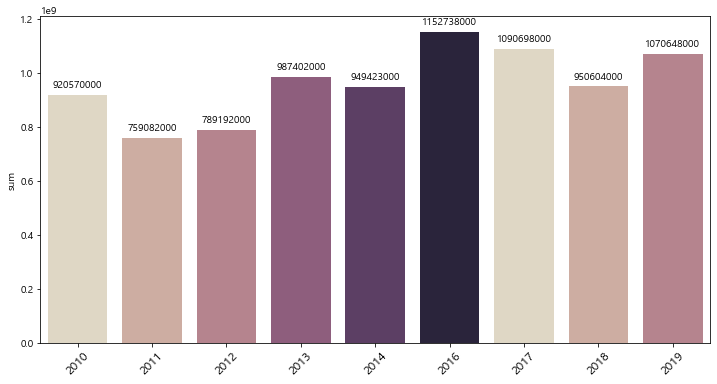

In [24]:
barchart_data = use_data.sum(axis=1).sort_values(ascending = False)
barchart_data = pd.DataFrame(barchart_data, columns = ["sum"])

plt.figure(figsize=(12,6))
palette = sns.color_palette("ch:s=-.2,r=.6")

g = sns.barplot(data=barchart_data[1:], x=barchart_data[1:].index, y="sum", palette=palette)
ax = g
#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 
plt.xticks(fontsize=12, rotation=45)
plt.show()

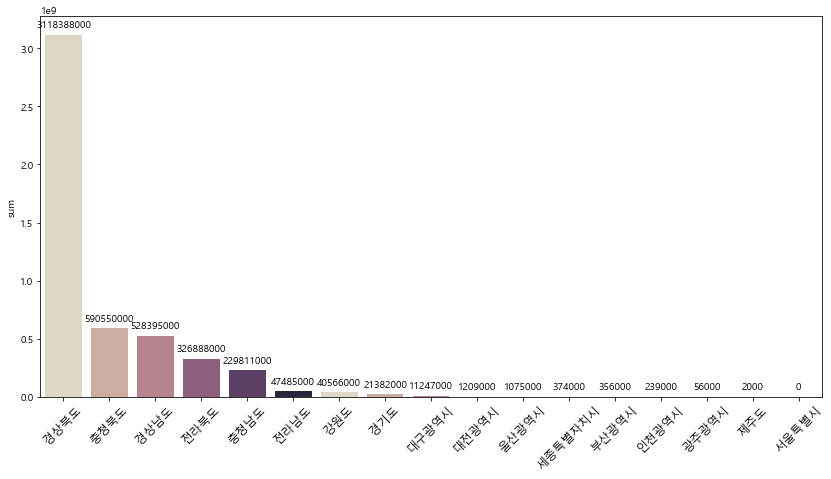

In [25]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

barchart_data = use_data.sum(axis=0).sort_values(ascending = False)
barchart_data = pd.DataFrame(barchart_data, columns = ["sum"])

plt.figure(figsize=(14,7))
palette = sns.color_palette("ch:s=-.2,r=.6")

g = sns.barplot(data=barchart_data[1:], x=barchart_data[1:].index, y="sum", palette=palette)
ax = g
#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 
plt.xticks(fontsize=12, rotation=45)
plt.show()

### 평균 유통 가격

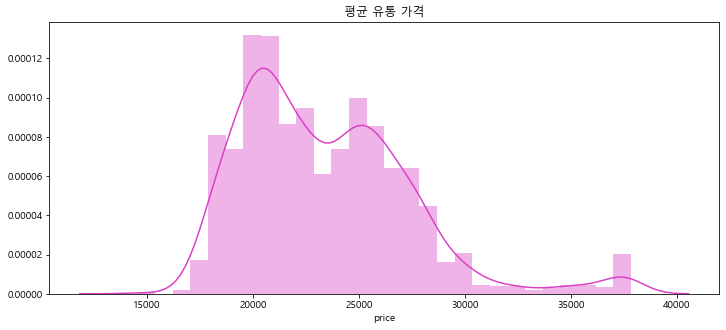

In [26]:
plt.figure(figsize=(12,5))
plt.title("평균 유통 가격")
ax = sns.distplot(day_price["price"], color = '#D941C5')

### 날씨와 생산량의 상관관계

In [27]:
use_temp = temp.copy()

use_temp['일시'] = use_temp['일시']+','
use_temp['year'] = use_temp["일시"].str.extract("(\d{4})-", expand=True)
use_temp['month'] = use_temp["일시"].str.extract("-(\d{2})-", expand=True)
use_temp['day'] = use_temp["일시"].str.extract("-(\d{2}),", expand=True)
use_temp['date'] = use_temp['year']+use_temp['month']+use_temp['day']

use_temp['date'] = use_temp['date'].astype(str)

del use_temp["지점명"]
del use_temp["지점"]
use_temp = use_temp.groupby(['year','month'], as_index=False).mean()

#생산량 데이터
use_output = output_data.copy()
use_output['year'] = use_output.index
use_output = use_output.iloc[:,-4:]
del use_output['경상남도']
del use_output['제주도']

#int 타입으로
use_output = use_output.astype(int)
use_temp = use_temp.astype(int)

#합치기
temp_output = pd.merge(use_temp, use_output, how = 'left', on = 'year')
temp_output = temp_output.rename(columns = {'price':'avgPrice'})
temp_output = temp_output.rename(columns = {'경상북도':'생산량'})

In [28]:
temp_output.isna().sum()

year              0
month             0
평균기온(°C)          0
최저기온(°C)          0
최고기온(°C)          0
일강수량(mm)          0
최대 순간 풍속(m/s)     0
최대 풍속(m/s)        0
평균 풍속(m/s)        0
평균 상대습도(%)        0
합계 일조시간(hr)       0
합계 일사량(MJ/m2)     0
평균 전운량(1/10)      0
생산량              11
dtype: int64

In [29]:
temp_output = temp_output.dropna()

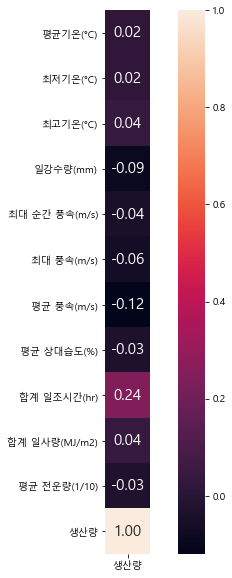

In [30]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

cols = ['평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
cm = pd.DataFrame(temp_output.iloc[:,2:].corr(method = 'pearson')['생산량'])
plt.figure(figsize=(10,10))
#sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 2,3,4월 개화기 저온, 강우,고온

In [31]:
temp_output_cold = temp_output[temp_output['month'].isin(['02','03','04'])]
heat_data = pd.DataFrame(temp_output_cold.iloc[:,2:].corr(method = 'pearson')['생산량'])

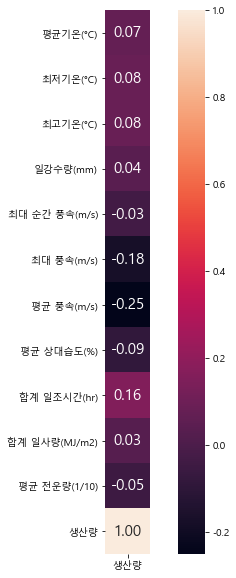

In [32]:
cols = ['평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

#### 5,6,7월

In [33]:
temp_output_hot = temp_output[temp_output['month'].isin(['05','06','07'])]
heat_data = pd.DataFrame(temp_output_hot.iloc[:,2:].corr(method = 'pearson')['생산량'])

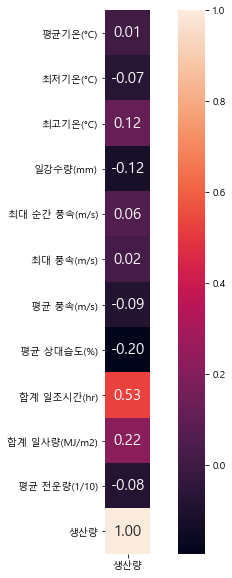

In [34]:
cols = ['평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 8, 9, 10,11 월

In [35]:
temp_output_rain = temp_output[temp_output['month'].isin(['08','09','10','11'])]
heat_data = pd.DataFrame(temp_output_rain.iloc[:,2:].corr(method = 'pearson')['생산량'])

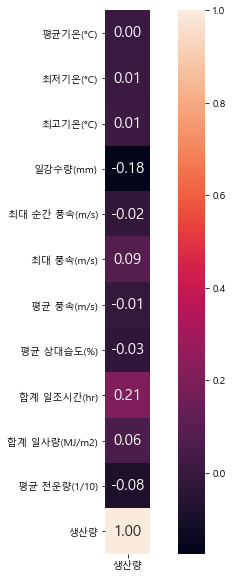

In [36]:
cols = ['평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 당해 년 생산량과 가격

In [37]:
use_data['year'] = use_data.index
use_data = use_data.astype(int)
day_price = day_price.astype(int)

In [38]:
line_data = pd.merge(use_data[['year','계']], day_price)
line_data = line_data[line_data['month'].isin(['10','11','12','01'])]

In [39]:
line_data = line_data.groupby('year').mean()

In [40]:
del line_data['month']
del line_data['day']
del line_data['date']

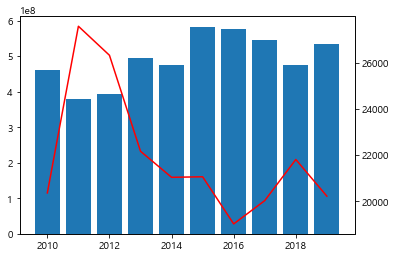

In [41]:
plt.bar(line_data.index,line_data['계'])
plt.twinx()  
plt.plot(line_data.index,line_data['price'], color='red')

plt.show()

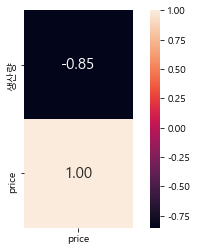

In [42]:
heat_data = pd.DataFrame(line_data.corr(method = 'pearson')['price'])
cols = ['생산량', 'price']
#plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 전년도 생산량과 가격

In [53]:
previous_data = output_data.copy()

previous_data = previous_data[['계']]
previous_data['year'] = previous_data.index

#전년도 생산량을 year로
#진짜 생산연도는 real_year
previous_data['real_year'] = previous_data['year']
previous_data['year'] = previous_data['year']+1

previous_data = previous_data.astype(int)

In [54]:
cor_data = pd.merge(previous_data, day_price)
cor_data = cor_data[cor_data['month'].isin(['02','03','04','05','06','07','08','09'])]

In [55]:
cor_data = cor_data.groupby('year').mean()
cor_data = cor_data[['계','price']]

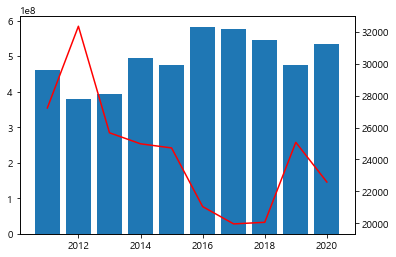

In [56]:
plt.bar(cor_data.index,cor_data['계'])
plt.twinx()  
plt.plot(cor_data.index,cor_data['price'], color='red')

plt.show()

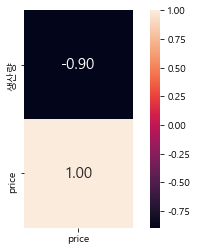

In [57]:
heat_data = pd.DataFrame(cor_data.corr(method = 'pearson')['price'])
cols = ['생산량','price']
#plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 소비자물가와 가격의 상관관계

In [66]:
price_df = pd.merge(day_price, consumer_price)
price_df = price_df[['price','물가']]
price_df.corr(method = 'pearson')

,price,물가
price,1.000000,-0.255014
물가,-0.255014,1.000000


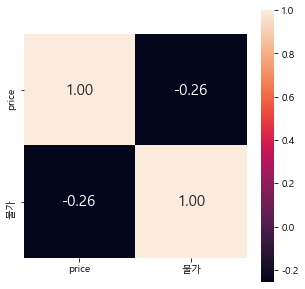

In [67]:
cols = ['price','물가']
cm = pd.DataFrame(price_df.corr(method = 'pearson'))
plt.figure(figsize=(5,5))
#sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 유통비용과 가격의 상관관계

In [68]:
distribution_data = distribution_data[distribution_data['year']>2009]
distribution_data = distribution_data.astype(int)

In [70]:
cor_data = pd.merge(distribution_data, day_price)
cor_data = cor_data.groupby(cor_data['year']).mean()

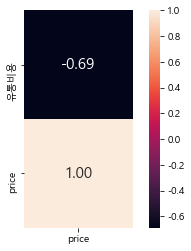

In [71]:
heat_data = pd.DataFrame(cor_data[['유통비용','price']].corr(method = 'pearson')['price'])
cols = ['유통비용', 'price']
#plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

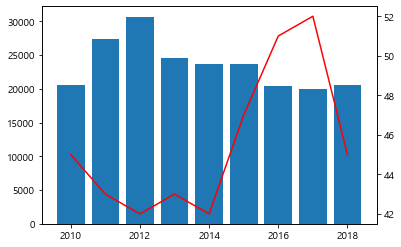

In [72]:
plt.bar(cor_data.index,cor_data['price'])
plt.twinx()  
plt.plot(cor_data.index,cor_data['유통비용'], color='red')

plt.show()

### 수출수입, 가격의 상관관계

In [82]:
use_export = export_data.copy()
use_export[use_export['month']=='합']

,year,month,수출(중량),수출(금액),수입(중량),수입(금액)
0,2010,합,8436518,17522609,24400,50508
13,2011,합,3131947,8356074,108335,276070
26,2012,합,1693598,5534808,25000,94062
39,2013,합,2787723,6980142,0,0
52,2014,합,2217023,5429614,1,7
65,2015,합,3502482,8180694,80594,135684
78,2016,합,3946867,8748162,30873,44527
91,2017,합,2842629,7013596,0,0
104,2018,합,2638571,6964858,0,0
117,2019,합,2644122,6364159,13230,32545


In [83]:
#수출수입 데이터 year, month
use_export = export_data.copy()
use_export = use_export.drop(export_data.index[0], axis=0)
use_export = use_export.drop(export_data.index[13], axis=0)
use_export = use_export.drop(export_data.index[26], axis=0)
use_export = use_export.drop(export_data.index[39], axis=0)
use_export = use_export.drop(export_data.index[52], axis=0)
use_export = use_export.drop(export_data.index[65], axis=0)
use_export = use_export.drop(export_data.index[78], axis=0)
use_export = use_export.drop(export_data.index[91], axis=0)
use_export = use_export.drop(export_data.index[104], axis=0)
use_export = use_export.drop(export_data.index[117], axis=0)
use_export = use_export.drop(export_data.index[130], axis=0)

#가격 데이터 year, month, day
use_price = day_price.copy()
#use_price = use_price.groupby(by = ["year", "month"], as_index=False).mean()
use_export = use_export.astype(int)
use_price = use_price.astype(int)

export_cor_data = pd.merge(use_price, use_export ,how='left')

In [85]:
export_cor_data.isna().sum()

year       0
month      0
day        0
date       0
price      0
수출(중량)    13
수출(금액)    13
수입(중량)    13
수입(금액)    13
dtype: int64

In [86]:
export_cor_data = export_cor_data.dropna()

In [87]:
export_cor_data = export_cor_data[['수출(중량)','수출(금액)','수입(중량)','수입(금액)','price']]

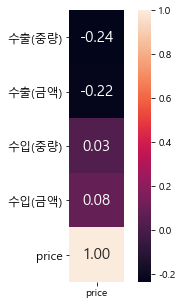

In [88]:
cols = ['수출(중량)','수출(금액)','수입(중량)','수입(금액)','price']
heat_data = pd.DataFrame(export_cor_data.corr(method = 'pearson')['price'])
plt.figure(figsize=(5,5))
plt.yticks(fontsize=12, rotation=45)
#sns.set(font_scale = 1.7)
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 공급량과 가격

In [93]:
#공급량 데이터 date-day
use_supply = supply_data.copy()
use_supply = use_supply.drop([0])
use_supply = use_supply.drop([1])
use_supply = use_supply.rename(columns = {'거래년월일':'date'})
use_supply['date'] = pd.to_datetime(use_supply["date"])
use_supply['date'] = use_supply['date'].astype(str)
use_supply['date'] = use_supply['date']+','
use_supply['year'] = use_supply["date"].str.extract("(\d{4})-", expand=True)
use_supply['month'] = use_supply["date"].str.extract("-(\d{2})-", expand=True)
use_supply['day'] = use_supply["date"].str.extract("-(\d{2}),", expand=True)
use_supply['date'] = use_supply['year']+use_supply['month']+use_supply['day']
use_supply['거래량'] = use_supply['거래량'].astype(str)
use_supply['거래량'] = use_supply['거래량'].apply(lambda x: remove_punct(x))
del use_supply['품목명']
use_supply = use_supply.astype(int)
use_supply = use_supply.groupby(by = ["year", "month", "day","date"], as_index=False).sum()
use_supply = use_supply.astype(int)

supply_cor_data = pd.merge(use_price, use_supply, how="left")

In [94]:
supply_cor_data = supply_cor_data[['price','거래량']]

In [95]:
heat_data = pd.DataFrame(supply_cor_data.corr(method = 'pearson')['price'])

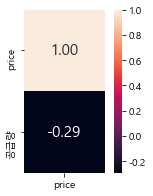

In [96]:
cols = ['price','공급량']
plt.figure(figsize=(3,3))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 날씨와 가격의 상관관계

In [113]:
use_temp = temp.copy()

use_temp['일시'] = use_temp['일시']+','
use_temp['year'] = use_temp["일시"].str.extract("(\d{4})-", expand=True)
use_temp['month'] = use_temp["일시"].str.extract("-(\d{2})-", expand=True)
use_temp['day'] = use_temp["일시"].str.extract("-(\d{2}),", expand=True)
use_temp['date'] = use_temp['year']+use_temp['month']+use_temp['day']
del use_temp['year']
del use_temp['month']
del use_temp['day']

use_temp['date'] = use_temp['date'].astype(int)

#합치기
temp_price = pd.merge(day_price, use_temp, how = 'left', on = 'date')
temp_price = temp_price.rename(columns = {'price':'avgPrice'})

In [114]:
temp_price.isna().sum()

year             0
month            0
day              0
date             0
avgPrice         0
지점               1
지점명              1
일시               1
평균기온(°C)         1
최저기온(°C)         1
최고기온(°C)         1
일강수량(mm)         1
최대 순간 풍속(m/s)    1
최대 풍속(m/s)       1
평균 풍속(m/s)       1
평균 상대습도(%)       1
합계 일조시간(hr)      1
합계 일사량(MJ/m2)    1
평균 전운량(1/10)     1
dtype: int64

In [115]:
temp_price = temp_price.dropna()

In [116]:
temp_price = temp_price.drop(['date'], axis=1)

del temp_price['일시']
del temp_price['지점명']
del temp_price['지점']

temp_price = temp_price.astype(int)

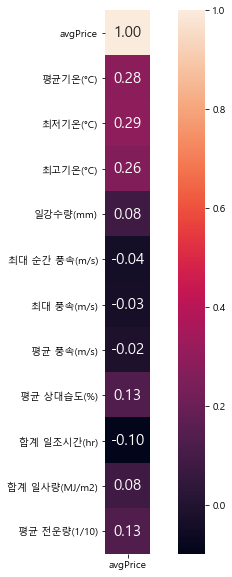

In [117]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

cols = ['avgPrice','평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)']
cm = pd.DataFrame(temp_price.iloc[:,3:].corr(method = 'pearson')['avgPrice'])
plt.figure(figsize=(10,10))
#sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

## Prophet

In [134]:
use_price = day_price.copy()
use_price.head(3)

,year,month,day,date,price
0,2010,1,4,20100104,18089
1,2010,1,5,20100105,18080
2,2010,1,6,20100106,18080


In [135]:
use_price['date'] = pd.to_datetime(use_price['date'], format="%Y%m%d")

In [137]:
use_price = use_price[['date', 'price']].reset_index(drop=True)

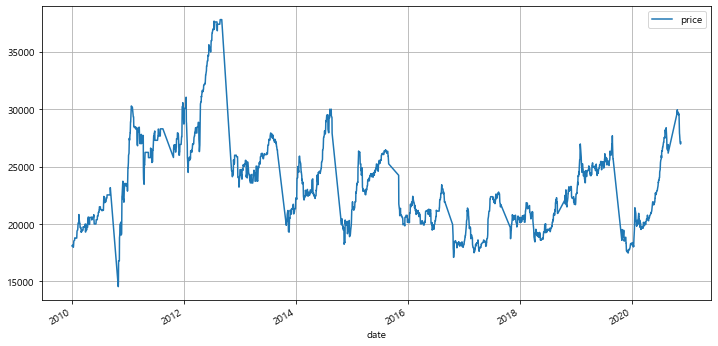

In [138]:
use_price.plot(x='date', y='price', kind="line", figsize=(12,6), grid=True)

In [139]:
use_price = use_price.rename(columns={'date':'ds', 'price':'y'})

In [140]:
m = Prophet()
m.fit(use_price)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [141]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [142]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2647,2021-11-14,25404.280430,19674.334614,25744.266433,23784.927055,26949.478186,-2695.796718,-2695.796718,-2695.796718,-265.789756,-265.789756,-265.789756,-2430.006962,-2430.006962,-2430.006962,0.0,0.0,0.0,22708.483712
2648,2021-11-15,25407.492953,19995.336271,26231.095158,23781.112706,26960.392206,-2340.453973,-2340.453973,-2340.453973,83.520252,83.520252,83.520252,-2423.974225,-2423.974225,-2423.974225,0.0,0.0,0.0,23067.038980
2649,2021-11-16,25410.705476,20052.045780,26104.262612,23777.298356,26971.306226,-2285.757764,-2285.757764,-2285.757764,129.190742,129.190742,129.190742,-2414.948507,-2414.948507,-2414.948507,0.0,0.0,0.0,23124.947711
2650,2021-11-17,25413.917998,19928.148110,26144.891353,23773.484006,26982.220246,-2271.351753,-2271.351753,-2271.351753,132.579111,132.579111,132.579111,-2403.930864,-2403.930864,-2403.930864,0.0,0.0,0.0,23142.566245
2651,2021-11-18,25417.130521,19945.970432,26370.991571,23769.669657,26993.134267,-2280.595966,-2280.595966,-2280.595966,111.216307,111.216307,111.216307,-2391.812274,-2391.812274,-2391.812274,0.0,0.0,0.0,23136.534554


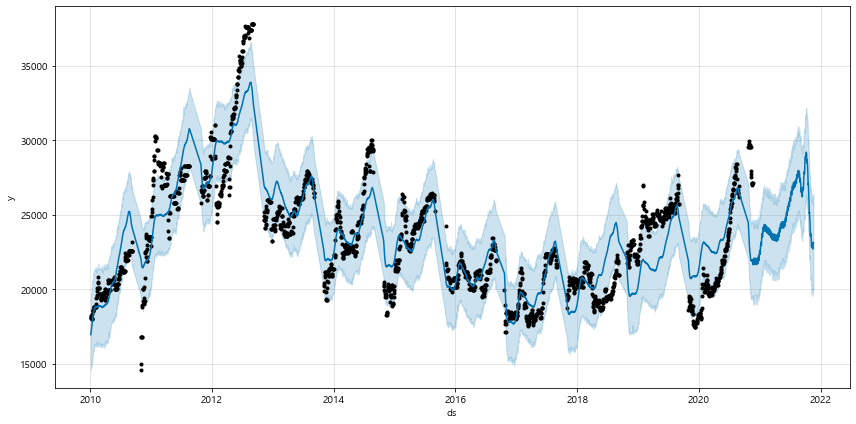

In [143]:
fig1 = m.plot(forecast, figsize=(12,6))

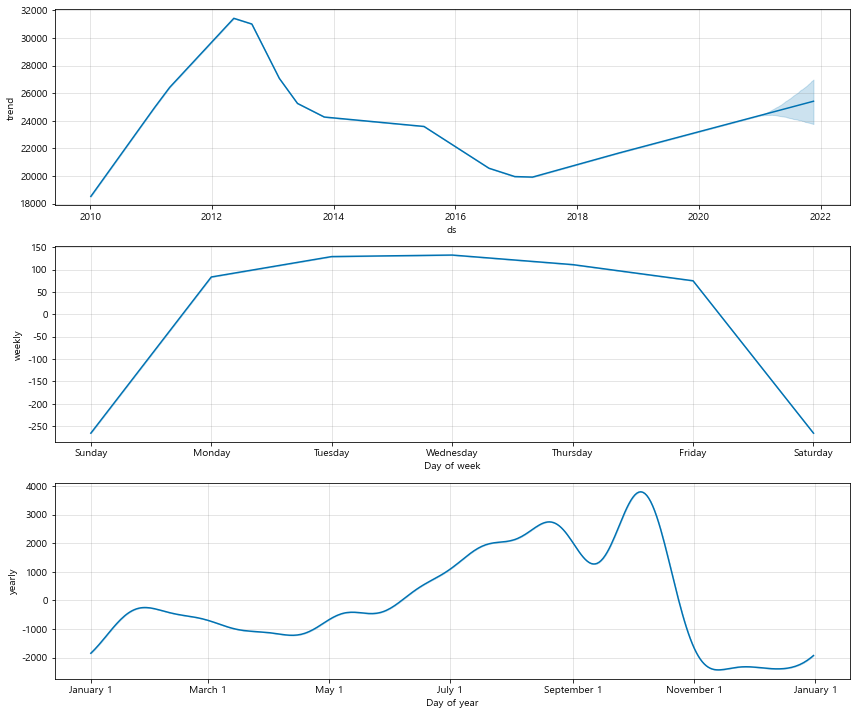

In [144]:
fig2 = m.plot_components(forecast, figsize=(12,10))

# save csv

In [151]:
output_data['year'] = output_data.index

In [152]:
save_data = pd.merge(output_data[['계','year']], distribution_data, how='left')

In [153]:
save_data = pd.merge(day_price, save_data, how='left')

In [154]:
a = temp[['일시','평균기온(°C)','최저기온(°C)','최고기온(°C)']]

In [155]:
save_data['date'] = pd.to_datetime(save_data['date'], format='%Y%m%d')
save_data['date'] = save_data['date'].astype(str)
a = a.rename(columns = {'일시':'date'})
a['date'] = a['date'].astype(str)

In [156]:
a

,date,평균기온(°C),최저기온(°C),최고기온(°C)
8030,2010-01-01,-5.5,-10.1,0.9
8031,2010-01-02,-2.8,-7.1,2.0
8032,2010-01-03,-3.8,-7.4,0.4
8033,2010-01-04,-3.3,-5.2,-1.2
8034,2010-01-05,-6.7,-9.6,-3.3
...,...,...,...,...
7723,2020-11-13,8.2,-0.5,17.7
7724,2020-11-14,9.8,2.7,18.3
7725,2020-11-15,9.7,4.0,18.1
7726,2020-11-16,11.0,2.9,19.1


In [157]:
save_data = pd.merge(save_data, a, how='left')

In [158]:
save_data.index = save_data['date']
del save_data['year']
del save_data['month']
del save_data['day']
del save_data['date']

In [159]:
save_data.head(3)

,price,계,유통비용,평균기온(°C),최저기온(°C),최고기온(°C)
date,,,,,,
2010-01-04,18089,460285000.0,45.0,-3.3,-5.2,-1.2
2010-01-05,18080,460285000.0,45.0,-6.7,-9.6,-3.3
2010-01-06,18080,460285000.0,45.0,-9.0,-14.3,-3.9


In [160]:
save_data.isna().sum()

price         0
계           183
유통비용        393
평균기온(°C)      1
최저기온(°C)      1
최고기온(°C)      1
dtype: int64

In [161]:
save_data = save_data.dropna()

In [162]:
save_data = save_data.rename(columns = {'계':'생산량'})
save_data = save_data[['평균기온(°C)','최저기온(°C)','최고기온(°C)','유통비용','생산량','price']]

In [163]:
save_data.to_csv('D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/사과/후지/data.csv', index=True)